Erreur quadratique moyenne (MSE) : 0.00
Coefficient de détermination (R^2) : 0.71
le minimum variance hedge ratio est :  0.020090956497508545


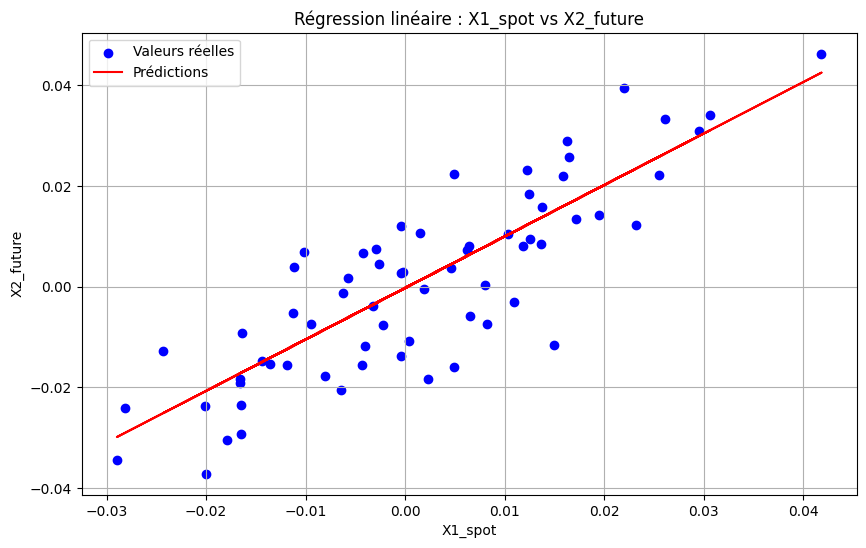

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Lire les données du fichier CSV
gold = pd.read_csv('gold_price_variations.csv', header=0)

# Diviser les données en ensembles d'entraînement et de test
Xtrain = gold.loc[0:299, 'X1_spot'].values.reshape(-1,1)
Ytrain = gold.loc[0:299, 'X2_futures'].values #transfoemation en numpy array
Xtest = gold.loc[300:, 'X1_spot'].values.reshape(-1,1) #transfoemation en numpy array et reshape arrange en en 1 colonne et autant de ligne que nécessaire
Ytest = gold.loc[300:, 'X2_futures'].values #transfoemation en numpy array

#Normalisation des données
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# Créer et entraîner un modèle de régression linéaire
model = LinearRegression()
model.fit(Xtrain_scaled, Ytrain)

# Prédire les valeurs sur l'ensemble de test
Ypred = model.predict(Xtest_scaled)

# Évaluation du modèle
mse = mean_squared_error(Ytest, Ypred)
r2 = r2_score(Ytest, Ypred)



# Afficher les résultats
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Coefficient de détermination (R^2) : {r2:.2f}")

# Afficher les résultats h 
h=model.coef_[0]
print("le minimum variance hedge ratio est égale : ",h)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(Xtest, Ytest, color='blue', label='Valeurs réelles')
plt.plot(Xtest, Ypred, color='red', label='Prédictions')
plt.xlabel('X1_spot')
plt.ylabel('X2_future')
plt.title('Régression linéaire : X1_spot vs X2_future')
plt.legend()
plt.grid()
plt.show()



In [75]:
def calcul_quantite_optimal(h,Q_spot,prix_spot,Q_un_future,prix_future):  
    N=h*((Q_spot*prix_spot)/(Q_un_future*prix_future))
    return N



prix_spot_euro=1950/1.1 # conversion en euro 
Q_spot=1000    

Q_un_future=100
prix_un_future=1970/1.1 # conversion en euro 
N=calcul_quantite_optimal(h,Q_spot,prix_spot_euro,Q_un_future,prix_un_future)
print("la quantité optimal à acheter est de : ",N)

    

la quantité optimal à acheter est de :  0.19886987396010994
